In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-msc-dataset/Rice_MSC_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-msc-dataset/Rice_MSC_Dataset/Rice_MSC_Dataset.arff
/kaggle/input/rice-msc-dataset/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx


In [2]:
!pip install flaml
!pip install openpyxl
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D
from sklearn.model_selection import train_test_split
from flaml import AutoML
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.5 MB/s eta 0:00:00


In [3]:
RiceData = pd.read_excel('/kaggle/input/rice-msc-dataset/Rice_MSC_Dataset/Rice_MSC_Dataset.xlsx')
RiceData.fillna(0, inplace=True)

In [4]:
dictForClasses = {k: v for k, v in zip(list(set(RiceData.iloc[:, -1].tolist())),list(range(len(list(set(RiceData.iloc[:, -1].tolist()))))))}
dictForClasses

{'Arborio': 0, 'Basmati': 1, 'Karacadag': 2, 'Jasmine': 3, 'Ipsala': 4}

In [5]:
for i in range(75000):
    classes = dictForClasses[RiceData.iloc[i, -1]]
    RiceData.loc[i, 'CLASS'] = classes

In [6]:
RiceData

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,1
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,0
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,3
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,1
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,0
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,2
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,0
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,4


In [7]:
X = np.array(RiceData.iloc[:, 0:106])
y = np.asarray(RiceData.iloc[:, -1]).astype('int64')

In [8]:
X.shape

(75000, 106)

In [9]:
y.shape

(75000,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

model = AutoML()
model.fit(X_train, y_train, metric='accuracy', task='classification', time_budget=10)

[flaml.automl: 05-09 06:12:24] {2105} INFO - task = classification
[flaml.automl: 05-09 06:12:24] {2107} INFO - Data split method: stratified
[flaml.automl: 05-09 06:12:24] {2111} INFO - Evaluation method: holdout
[flaml.automl: 05-09 06:12:24] {2188} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-09 06:12:24] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-09 06:12:24] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-09 06:12:24] {2698} INFO - Estimated sufficient time budget=15755s. Estimated necessary time budget=387s.
[flaml.automl: 05-09 06:12:24] {2750} INFO -  at 0.6s,	estimator lgbm's best error=0.0110,	best estimator lgbm's best error=0.0110
[flaml.automl: 05-09 06:12:24] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-09 06:12:25] {2750} INFO -  at 0.9s,	estimator lgbm's best error=0.0110,	best estimator lgbm's best error=0.0110
[fl

In [11]:
print('Best ML Model: ', model.best_estimator)
print('Best hyperparmeter config: ', model.best_config)
print('Best accuracy on validation data: %f' %(1 - model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model:  lgbm
Best hyperparmeter config:  {'n_estimators': 46, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.40106881032023267, 'log_max_bin': 10, 'colsample_bytree': 0.8591464191448509, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.14586454205299842, 'FLAML_sample_size': 10000}
Best accuracy on validation data: 0.997158
Training duration of best run: 4.507026 s


In [12]:
class RiceModel(tf.keras.Model):
    def __init__(self):
        super(RiceModel, self).__init__()
        self.B1 = BatchNormalization()
        self.D1 = Dense(128, activation='relu')
        self.Dr1 = Dropout(0.2)
        self.D2 = Dense(256, activation='relu')
        self.Dr2 = Dropout(0.2)
        self.D3 = Dense(5, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
        
    def call(self, x):
        x = self.B1(x)
        x = self.D1(x)
        x = self.Dr1(x)
        x = self.D2(x)
        x = self.Dr2(x)
        y = self.D3(x)
        
        return y
    
model = RiceModel()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

history = model.fit(X, y, batch_size=128, epochs=20, validation_split=0.3, validation_freq=1)

model.summary()

2022-05-09 06:12:39.992290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 06:12:39.997229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 06:12:39.998001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 06:12:39.999472: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
411/411 [==============================] - 3s 4ms/step - loss: 0.0975 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0283 - val_sparse_categorical_accuracy: 0.9981
Epoch 2/20
411/411 [==============================] - 1s 3ms/step - loss: 0.0229 - sparse_categorical_accuracy: 0.9967 - val_loss: 0.0127 - val_sparse_categorical_accuracy: 0.9987
Epoch 3/20
411/411 [==============================] - 1s 3ms/step - loss: 0.0148 - sparse_categorical_accuracy: 0.9976 - val_loss: 0.0098 - val_sparse_categorical_accuracy: 0.9989
Epoch 4/20
411/411 [==============================] - 1s 4ms/step - loss: 0.0125 - sparse_categorical_accuracy: 0.9977 - val_loss: 0.0092 - val_sparse_categorical_accuracy: 0.9985
Epoch 5/20
411/411 [==============================] - 1s 3ms/step - loss: 0.0113 - sparse_categorical_accuracy: 0.9978 - val_loss: 0.0077 - val_sparse_categorical_accuracy: 0.9988
Epoch 6/20
411/411 [==============================] - 1s 3ms/step - loss: 0.0096 - sparse_categorica

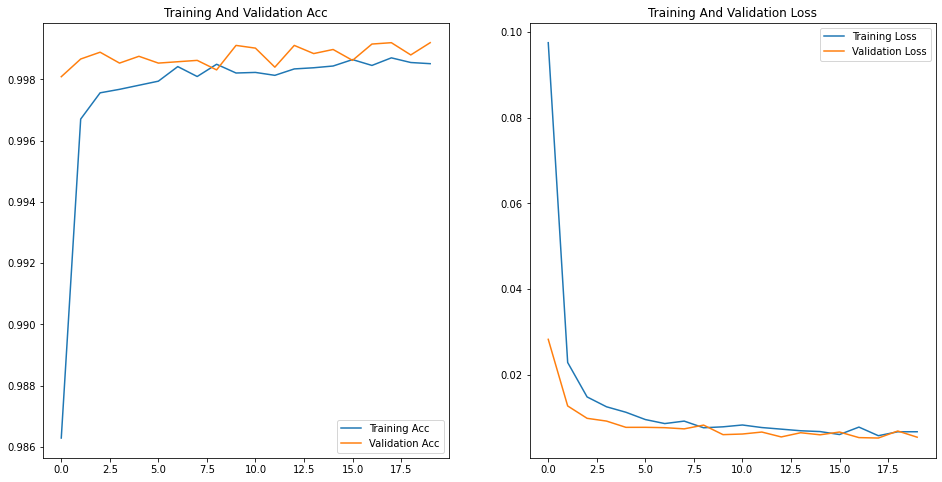

In [13]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')

plt.legend()
plt.show()